In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

from pyrsgis import raster
from pyrsgis.convert import changeDimension

In [92]:
# bands are B1 - B7, B8 is Mangroves, B9 is NVDI
# file = "../SatelliteImages/Florida_1_2000.tif"
# file = "../SatelliteImages/Florida_1_2020.tif"

# file = "../SatelliteImages/Florida_1_2000_simple_composite.tif"
# file = "../SatelliteImages/Florida_1_2020_simple_composite.tif"
file = "../SatelliteImages/Florida_1_2020_L8_simple_composite.tif"


# file = "../SatelliteImages/ndvi_test_30.tif"
# file = "../SatelliteImages/ndvi_test_no_rectangle.tif"
# file = "../SatelliteImages/ndvi_test_with_water.tif"
# file = "../SatelliteImages/ndvi_test_no_ndvi.tif"
# file = "../SatelliteImages/ndvi_test_with_float_bands.tif"


In [93]:
img = rasterio.open(file)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


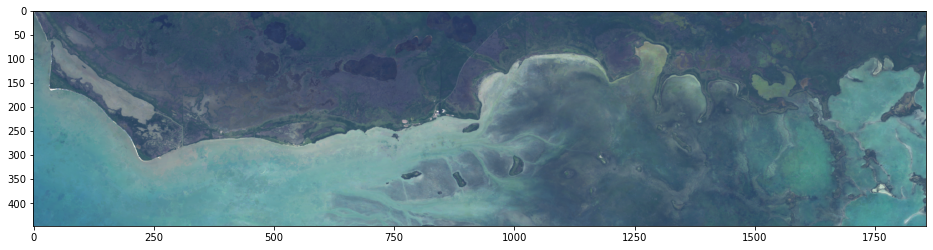

In [94]:
multiple = 4
# red = img.read(3) * multiple
# green = img.read(2) * multiple
# blue = img.read(1) * multiple

# print(red)

red = img.read(4) * multiple
green = img.read(3) * multiple
blue = img.read(2) * multiple

rgb = np.dstack((red, green, blue))

plt.figure(figsize=(16,6))
# plt.imshow(rgb, vmin=0.1, vmax=0.2)
plt.imshow(rgb)
# plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


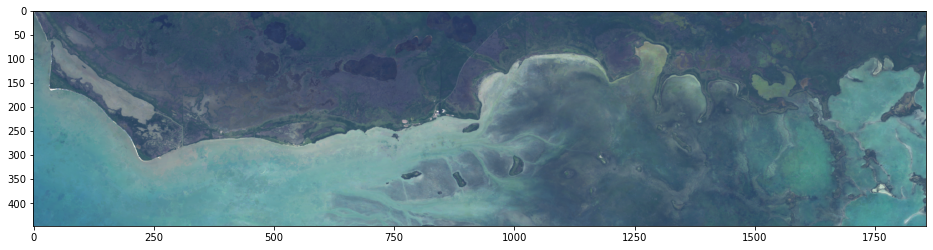

In [95]:
# ds, blue = raster.read(file, bands=1)
# ds, green = raster.read(file, bands=2)
# ds, red = raster.read(file, bands=3)

ds, blue = raster.read(file, bands=2)
ds, green = raster.read(file, bands=3)
ds, red = raster.read(file, bands=4)

# print(features.shape)
# blue, green, red = features[:,1:-1,1:-1]
# blue = features
# print(blue)
# print(np.unique(blue))
rgb = np.dstack((red * multiple, green * multiple, blue * multiple))

plt.figure(figsize=(16,6))
# plt.imshow(rgb, vmin=0.1, vmax=0.2)
plt.imshow(rgb)
# plt.imshow(blue)
# plt.colorbar()
plt.show()

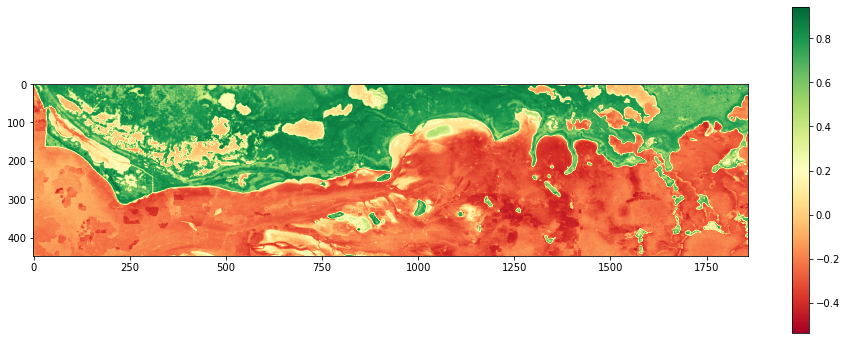

In [101]:
plt.figure(figsize=(16,6))
plt.imshow(img.read(9), cmap='RdYlGn')
plt.colorbar()
plt.show()

# show(img)#, colormap='seismic')

In [102]:
def norm(band):
    band_min, band_max = band.min(), band.max()
    print('type is, ', type(((band - band_min)/(band_max - band_min))[0][0]))
    return ((band - band_min)/(band_max - band_min))

In [103]:
# plt.figure(figsize=(16,6))
# # rgb_stack = np.dstack((img.read(3), img.read(2), img.read(1)))
# rgb_stack = np.dstack((norm(img.read(3)), norm(img.read(2)), norm(img.read(1))))
# plt.imshow(rgb_stack)#, cmap='RdYlGn')
# # plt.colorbar()
# plt.show()

In [104]:
print('num bands: ', img.count)
print('resolution: ', img.height, img.width)
print('crs: ', img.crs)
print('band types:\n', {i: dtype for i, dtype in zip(img.indexes, img.dtypes)})
print(img.meta)


num bands:  9
resolution:  447 1857
crs:  EPSG:4326
band types:
 {1: 'float32', 2: 'float32', 3: 'float32', 4: 'float32', 5: 'float32', 6: 'float32', 7: 'float32', 8: 'float32', 9: 'float32'}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1857, 'height': 447, 'count': 9, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00026949458523585647, 0.0, -81.1502095062211,
       0.0, -0.00026949458523585647, 25.20043866540494)}


In [131]:
print(img.indexes)
band1 = img.read(1)
print(type(band1))
print(band1.shape, band1.size)

print(band1[0].size)
band1

# for i in band1[0]:
#     print(i)

(1, 2, 3, 4, 5, 6, 7, 8, 9)
<class 'numpy.ndarray'>
(447, 1857) 830079
1857


array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [1013.,  366.,  366., ...,  440.,  440.,  391.],
       [1525.,  760.,  760., ...,  380.,  380.,  429.],
       ...,
       [1129.,  996.,  928., ..., 1185., 1170., 1170.],
       [ 945.,  979.,  928., ..., 1138., 1138., 1138.],
       [ 963.,  945.,  912., ..., 1121., 1121., 1106.]], dtype=float32)

In [132]:
np.count_nonzero(np.isnan(band1))

1644

In [ ]:
# need to deal with nans at the top row (if that's what it is - might be different for different images)
# need to fill nans in mangrove band with 0